# Predictive Maintenance for Manufacturing Machines

## Model 1: Failure Prediction

### Goal:

Is to reduce the time of downtime, is the machine is likly to fail and classify the type of failure.

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve, average_precision_score, classification_report


In [106]:
df = pd.read_csv("Data/ai4i2020.csv")

In [107]:
df.duplicated().sum()

np.int64(0)

In [108]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [109]:
df = df.drop(columns=["UDI", "Product ID"])

In [110]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [111]:
features = ["Type", "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
target = "Machine failure"

In [112]:
X = df[features]
y = df[target]

### Train/Test Split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Preprocessing

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [115]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

In [116]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(), cat_features)
    ]
)

### Model Defination

In [117]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

### Train and Evaluate

In [118]:
for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("clf", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.3f}")

Logistic Regression Accuracy: 0.968
Random Forest Accuracy: 0.981
Gradient Boosting Accuracy: 0.986


## Model 2: Failure Type Classification

In [119]:
failure_cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]
df["failure_type"] = df[failure_cols].idxmax(axis=1)
df_fail = df[df[failure_cols].sum(axis=1) > 0].copy()           

In [120]:
features_failure = ["Type", "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
target_failure = "failure_type"

In [121]:
X = df_fail[features]
y = df_fail[target]

### Train/Test Split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [123]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

### Preprocessing

In [124]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),  # <- same as previous code
    ],
    remainder="drop",
    sparse_threshold=0,
)

### Model Defination

In [125]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "SVM (RBF)": SVC(kernel="rbf", gamma="scale", C=1.0, class_weight="balanced"),
    "Naive Bayes": GaussianNB(),
}

### Train and Evaluate


In [126]:
for name, clf in models.items():
    pipe = Pipeline([("pre", preprocessor), ("clf", clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Decision Tree Accuracy: 0.971
SVM (RBF) Accuracy: 0.914
Naive Bayes Accuracy: 0.900


## Evaluation

### Model 1

In [127]:
def evaluate_pr(y_true, y_scores, name):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    pr_auc = average_precision_score(y_true, y_scores)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-12)
    best_idx = np.nanargmax(f1[1:]) + 1
    best_thr = thresholds[best_idx - 1]         
    y_pred = (y_scores >= best_thr).astype(int)

    print(f"\n=== {name} — Precision–Recall ===")
    print(f"PR-AUC: {pr_auc:.4f} | Best thr: {best_thr:.3f} | "
          f"P: {precision[best_idx]:.3f} | R: {recall[best_idx]:.3f} | F1: {f1[best_idx]:.3f}")
    print(classification_report(y_true, y_pred, target_names=["No Failure", "Failure"], digits=4))

    return {"model": name, "pr_auc": pr_auc, "best_thr": best_thr,
            "precision": float(precision[best_idx]),
            "recall": float(recall[best_idx]),
            "f1": float(f1[best_idx])}


models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight="balanced_subsample", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

summary = []
for name, clf in models.items():
    pipe = Pipeline([("pre", preprocessor), ("clf", clf)])
    pipe.fit(X_train, y_train)
    y_scores = pipe.predict_proba(X_test)[:, 1]
    summary.append(evaluate_pr(y_test, y_scores, name))

print("\n=== PR Summary (higher PR-AUC is better) ===")
print(pd.DataFrame(summary).sort_values("pr_auc", ascending=False).to_string(index=False))



=== Logistic Regression — Precision–Recall ===
PR-AUC: 0.9872 | Best thr: 0.078 | P: 0.971 | R: 1.000 | F1: 0.985
              precision    recall  f1-score   support

  No Failure     1.0000    0.2500    0.4000         4
     Failure     0.9565    1.0000    0.9778        66

    accuracy                         0.9571        70
   macro avg     0.9783    0.6250    0.6889        70
weighted avg     0.9590    0.9571    0.9448        70


=== Random Forest — Precision–Recall ===
PR-AUC: 0.9998 | Best thr: 0.647 | P: 0.985 | R: 1.000 | F1: 0.992
              precision    recall  f1-score   support

  No Failure     1.0000    0.2500    0.4000         4
     Failure     0.9565    1.0000    0.9778        66

    accuracy                         0.9571        70
   macro avg     0.9783    0.6250    0.6889        70
weighted avg     0.9590    0.9571    0.9448        70


=== Gradient Boosting — Precision–Recall ===
PR-AUC: 0.9973 | Best thr: 0.472 | P: 0.985 | R: 1.000 | F1: 0.992
         

In [133]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

def plot_confusion_matrices(y_true, y_pred, labels, title_prefix=""):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(f"{title_prefix} Confusion Matrix (counts)")
    plt.tight_layout()
    plt.show()


    cm_norm = confusion_matrix(y_true, y_pred, labels=labels, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=labels)
    disp.plot(ax=ax, colorbar=True)
    ax.set_title(f"{title_prefix} Confusion Matrix (normalized)")
    plt.tight_layout()
    plt.show()


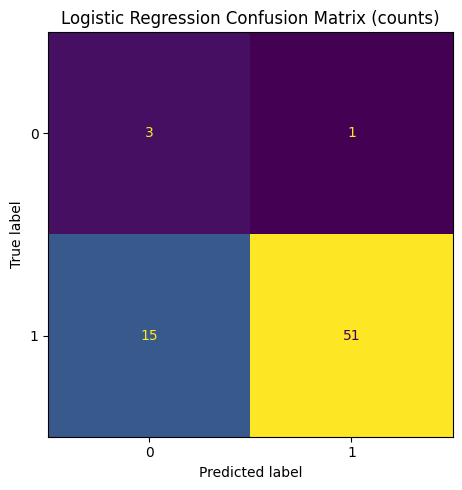

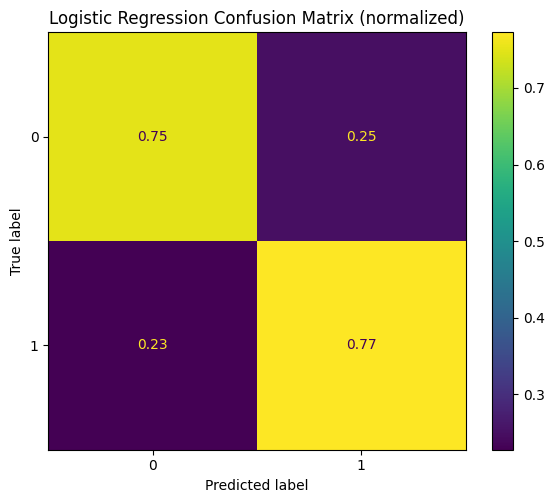

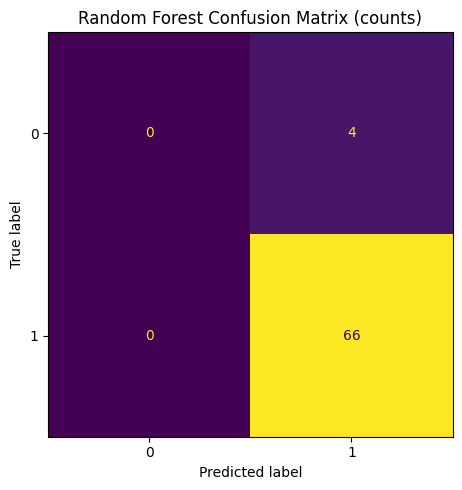

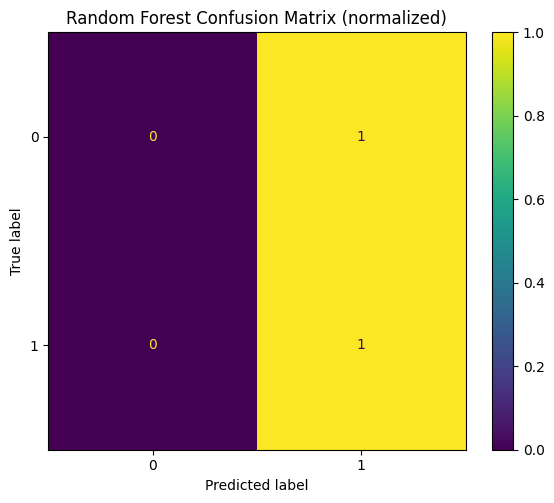

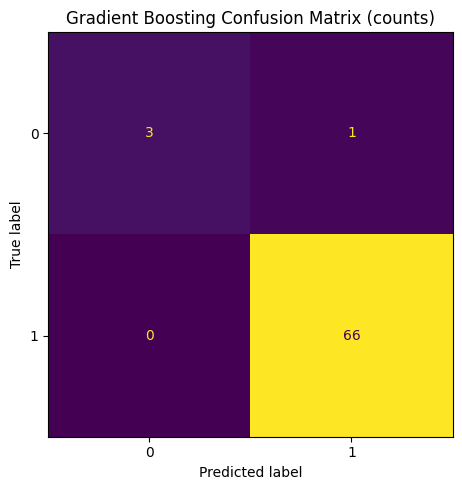

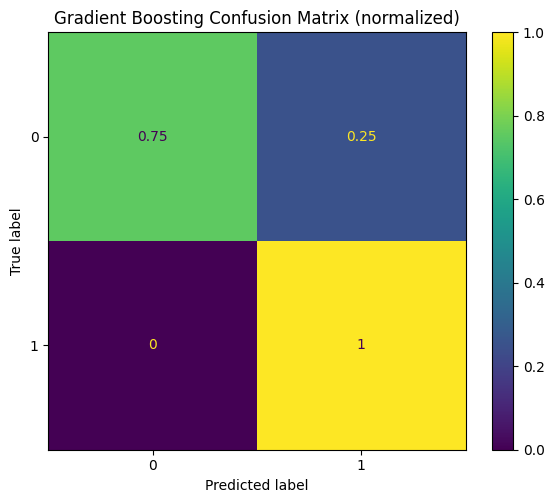

In [134]:
labels = np.unique(y_train).tolist()

for name, clf in models.items():
    pipe = Pipeline([("pre", preprocessor), ("clf", clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # plot confusion matrices for this model
    plot_confusion_matrices(y_test, y_pred, labels, title_prefix=name)
